=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1291
           1       0.64      0.52      0.58       467

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758


=== Confusion Matrix ===
[[1151  140]
 [ 222  245]]

ROC AUC Score: 0.8386


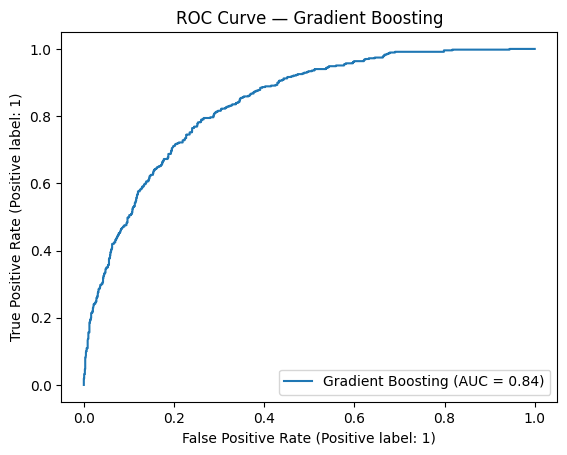

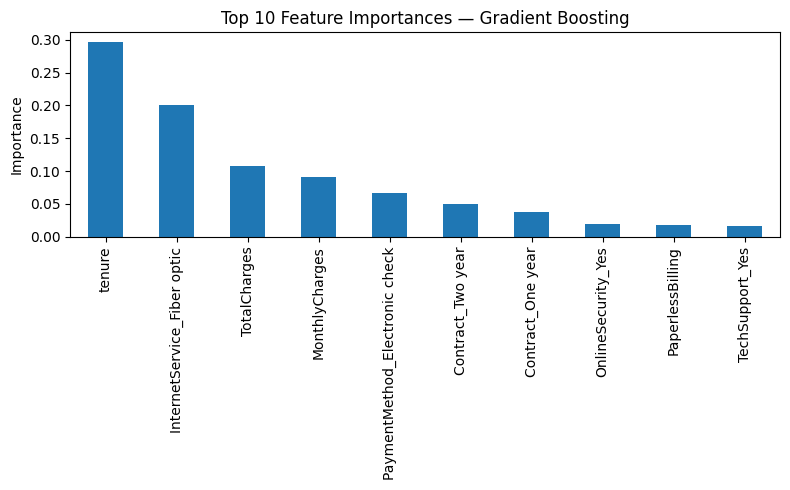

In [5]:
#%pip install --quiet scikit-learn pandas numpy matplotlib

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/Users/limengfeiyang/CMOR438-final-project/data/telco_churn_clean.csv')


# Preprocessing

# drop missing target
df = df.dropna(subset=['Churn'])                                
# target
y = df['Churn'].astype(int)                                     
# features
X = df.drop(columns=['Churn', 'customerID'], errors='ignore')   
# one-hot encode
X = pd.get_dummies(X, drop_first=True)                          


# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)


# Train Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gb.fit(X_train, y_train)


# Evaluate
y_pred = gb.predict(X_test)
y_proba = gb.predict_proba(X_test)[:,1]

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba, name="Gradient Boosting")
plt.title("ROC Curve — Gradient Boosting")
plt.show()


# Feature Importances
importances = pd.Series(gb.feature_importances_, index=X.columns)
top10 = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top10.plot.bar()
plt.title("Top 10 Feature Importances — Gradient Boosting")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

